# **Project Name**    - **EDA** - **Uber Demand Supply Gap**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project aims to identify the imbalance between ride demand and supply in Uber’s operations by analyzing customer request data using Python. The dataset includes fields such as request timestamp, pickup point (City or Airport), and trip status (Completed, Cancelled, No Cars Available).

The analysis began with data cleaning and preprocessing. Using Python (Pandas), timestamps were converted into datetime objects, and new features were engineered such as request_hour, time_slot, and day_type (weekday/weekend). These enriched variables were essential in segmenting the data by temporal demand.
The dataset used for this analysis includes 6 columns and over 6,500 ride records, with the following key features:

Request id: Unique identifier for each request

Pickup point: Either City or Airport

Status: Trip status – Completed, Cancelled, or No Cars Available

Request timestamp and Drop timestamp

Driver id: Available only for completed trips

In the exploratory data analysis (EDA) phase, the focus was on understanding the distribution of ride requests across different time slots, the success/failure rate of trip completions, and the impact of pickup location on supply availability. Visualization tools like Seaborn and Matplotlib helped highlight trends — for instance, a significant number of requests occurred during morning and evening peaks, with a noticeable spike in failures during these hours.

# **GitHub Link -**

https://github.com/rrejith66/Uber-Demand-Supply-Gap.git

# **Problem Statement**


In urban transportation systems, particularly those operated by ride-hailing platforms like Uber, maintaining a balance between ride demand and driver supply is critical to operational efficiency and customer satisfaction. However, consistent imbalances—especially during peak hours or at key locations—can lead to unfulfilled ride requests, driver inefficiencies, and lost revenue.

This project aims to analyze Uber’s ride request data to:

Identify when, where, and why demand exceeds supply, leading to trip cancellations or unavailability of cars.

By performing exploratory data analysis (EDA) on a real-world dataset that captures request timestamps, pickup points, trip statuses, and driver allocation, we seek to uncover patterns related to time slots, locations, and service fulfillment rates. The goal is to provide actionable insights that can help Uber:

Understand high-demand periods and underserved zones

Diagnose the root causes of trip failures (e.g., driver shortage, cancellations)

Make data-driven decisions for better driver distribution and resource planning

Ultimately, this analysis will help highlight operational gaps and propose data-backed recommendations to improve Uber’s service reliability and customer experience.

#### **Define Your Business Objective?**

The primary business objective of this project is to analyze ride request data from Uber to identify operational inefficiencies caused by the mismatch between customer demand and driver supply. By uncovering patterns in trip failures—such as cancellations and unavailability of cars—the goal is to deliver actionable insights that can help Uber:

Improve service availability during high-demand time slots and critical pickup locations (e.g., Airport, City)

Reduce the number of unfulfilled ride requests, thereby increasing customer satisfaction and ride completion rates

Optimize driver allocation by forecasting when and where supply shortages are likely to occur

Enhance operational decision-making through data-driven performance monitoring and visualization

Ultimately, the business aims to maximize ride completions, minimize customer churn, and boost revenue potential by aligning supply-side logistics with real-time demand trends.

# **General Guidelines** : -  

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [87]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [88]:
# Load Dataset
uber_data = pd.read_csv(r'D:\Labmentix\Project_2\drive-download\uber_demand_supply_gap.csv')

### Dataset First View

In [89]:
# Dataset First Look
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [90]:
# Dataset Rows & Columns count
uber_data.shape

(6745, 6)

### Dataset Information

In [91]:
# Dataset Info
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [92]:
# Dataset Duplicate Value Count
uber_data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [93]:
# Missing Values/Null Values Count
missing_values = uber_data.isnull().sum()
print("Missing Values Count:\n")
print(missing_values[missing_values > 0])

Missing Values Count:

Driver id         2650
Drop timestamp    3914
dtype: int64


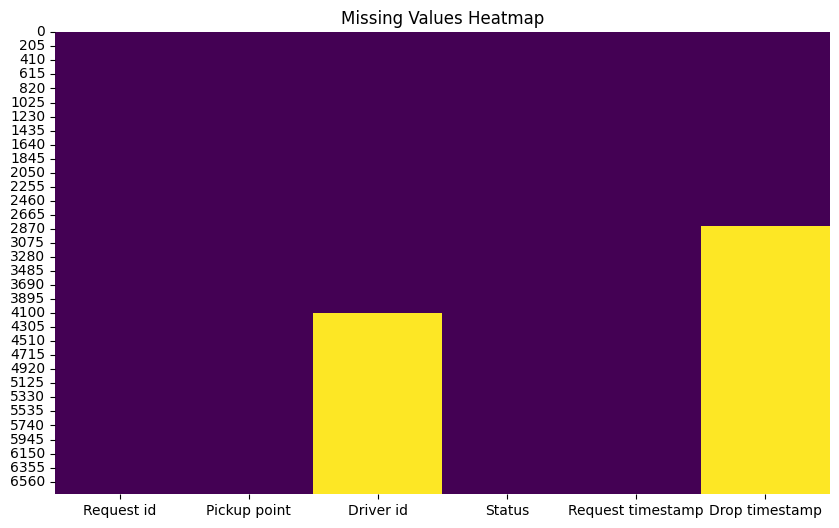

In [94]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(uber_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [110]:
# Dataset Columns
print("Dataset Columns:\n" ,uber_data.columns)

Dataset Columns:
 Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


In [96]:
# Dataset Describe
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [97]:
# Descriptive statistics on "Categorical Variables"
uber_data[['Pickup point','Status']].describe()

,Pickup point,Status
count,6745,6745
unique,2,3
top,City,Trip Completed
freq,3507,2831


Trips from city to airport are greater at approx 52% (3507/6745).

Trip completed tops the status and approx. 42% trips are completed.

### Variables Description

Metadata information on each column:

*Request id*: A unique identifier of the request

*Request timestamp*: The date and time at which the customer made the trip request

*Drop timestamp*: The drop-off date and time, in case the trip was completed

*Pickup point*: The point from which the request was made

*Driver id*: The unique identification number of the driver

*Status*: The final status of the trip (completed, cancelled by driver or no cars available)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [99]:
# Create a copy of the dataset
uber_dataset = uber_data.copy()

# Fix: Convert timestamps with proper handling of day-first format
uber_dataset['Request timestamp'] = pd.to_datetime(uber_dataset['Request timestamp'], dayfirst=True, errors='coerce')
uber_dataset['Drop timestamp'] = pd.to_datetime(uber_dataset['Drop timestamp'], dayfirst=True, errors='coerce')

# Remove rows where 'Request timestamp' is still missing (critical for analysis)
uber_dataset.dropna(subset=['Request timestamp'], inplace=True)

# Extract date/time features
uber_dataset['Request date'] = uber_dataset['Request timestamp'].dt.date
uber_dataset['Request time'] = uber_dataset['Request timestamp'].dt.time
uber_dataset['Drop date'] = uber_dataset['Drop timestamp'].dt.date
uber_dataset['Drop time'] = uber_dataset['Drop timestamp'].dt.time

# Fill missing 'Drop timestamp' with 'Request timestamp' for ongoing trips
uber_dataset['Drop timestamp'].fillna(uber_dataset['Request timestamp'], inplace=True)

# Calculate trip duration in minutes
uber_dataset['Trip duration (minutes)'] = (uber_dataset['Drop timestamp'] - uber_dataset['Request timestamp']).dt.total_seconds() / 60

# Ensure numeric type
uber_dataset['Trip duration (minutes)'] = pd.to_numeric(uber_dataset['Trip duration (minutes)'], errors='coerce')

# Convert categorical fields
uber_dataset['Pickup point'] = uber_dataset['Pickup point'].astype('category')
uber_dataset['Status'] = uber_dataset['Status'].astype('category')

# Clean 'Status' column formatting
uber_dataset['Status'] = uber_dataset['Status'].str.strip().str.title()

# Recreate Demand-Supply Gap column with No Gap = 0 and Gap = 1 categories
uber_dataset['Demand-Supply Gap'] = np.where(uber_dataset['Status'] == 'Trip Completed', '0', '1')
# uber_dataset['Demand-Supply Gap'] = uber_dataset['Demand-Supply Gap'].astype('category')
uber_dataset['Demand-Supply Gap'] = pd.to_numeric(uber_dataset['Demand-Supply Gap'], errors='coerce')


# Convert IDs to string
uber_dataset['Driver id'] = uber_dataset['Driver id'].astype(str)
uber_dataset['Request id'] = uber_dataset['Request id'].astype(str)

# Convert 'Request date' and 'Drop date' to datetime
uber_dataset['Request date'] = pd.to_datetime(uber_dataset['Request date'], errors='coerce')
uber_dataset['Drop date'] = pd.to_datetime(uber_dataset['Drop date'], errors='coerce')

# Remove invalid rows
uber_dataset.dropna(subset=['Drop timestamp'], inplace=True)
uber_dataset = uber_dataset[uber_dataset['Trip duration (minutes)'] >= 0]

# Day and Hour extraction
uber_dataset['Day of week'] = uber_dataset['Request timestamp'].dt.day_name()
uber_dataset['Hour of day'] = uber_dataset['Request timestamp'].dt.hour

# Time slot classification
def get_time_slot(hour):
    if 0 <= hour < 4:
        return "Late Night"
    elif 4 <= hour < 8:
        return "Early Morning"
    elif 8 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 20:
        return "Evening"
    else:
        return "Night"

uber_dataset['Time slot'] = uber_dataset['Hour of day'].apply(get_time_slot)

# Drop unnecessary intermediate columns
columns_to_remove = ['Request timestamp', 'Drop timestamp', 'Request date', 'Drop date', 'Request time', 'Drop time']
uber_dataset.drop(columns=columns_to_remove, inplace=True)

# Save the cleaned dataset to a new CSV file
uber_dataset.to_csv('uber_demand_supply_gap_cleaned.csv', index=False)

# Preview the cleaned dataset
uber_dataset.head()


,Request id,Pickup point,Driver id,Status,Trip duration (minutes),Demand-Supply Gap,Day of week,Hour of day,Time slot
0,619,Airport,1.0,Trip Completed,69.0,0,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,50.0,0,Monday,17,Evening
2,1807,City,1.0,Trip Completed,41.0,0,Tuesday,9,Morning
3,2532,Airport,1.0,Trip Completed,55.0,0,Tuesday,21,Night
9,267,City,2.0,Trip Completed,39.0,0,Monday,6,Early Morning


In [109]:
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2674 entries, 0 to 5103
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Request id               2674 non-null   object  
 1   Pickup point             2674 non-null   category
 2   Driver id                2674 non-null   object  
 3   Status                   2674 non-null   object  
 4   Trip duration (minutes)  2674 non-null   float64 
 5   Demand-Supply Gap        2674 non-null   int64   
 6   Day of week              2674 non-null   object  
 7   Hour of day              2674 non-null   int32   
 8   Time slot                2674 non-null   object  
dtypes: category(1), float64(1), int32(1), int64(1), object(5)
memory usage: 180.3+ KB


### What all manipulations have you done and insights you found?

*Data Cleaning & Preprocessing:*

1. A copy of the original dataset was created to ensure data integrity.

2. Request timestamp and Drop timestamp columns were parsed using the correct date format with day-first logic.

3. Rows missing critical request timestamps were removed.

4. Missing drop timestamps were filled with request timestamps, assuming it as failed trips.

5. Inconsistent status values were standardized (e.g., "Trip Completed", "Cancelled").

*Feature Engineering:*

1. Date and Time Components: Request date, Request time, Hour of day, and Day of week were derived.

2. Time Slots: Each request was categorized into a time slot such as Morning, Afternoon, or Late Night.

3. Trip Duration: Duration in minutes was calculated by subtracting request time from drop time.

4. Demand-Supply Gap: A new column was created where requests with a status other than "Trip Completed" were marked as “Gap”, indicating unmet demand.

*Insights Identified:*

1. Unmet demand is more prevalent during Early Morning and Late Night slots, likely due to fewer available drivers.

2. Pickup point analysis may reveal that locations like the Airport experience a higher rate of "No Cars Available".

3. Day-of-week trends may show greater demand or cancellations on weekends.

4. Trip durations can help flag abnormal rides and cancellations.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar Plot: Distribution of Trip Status

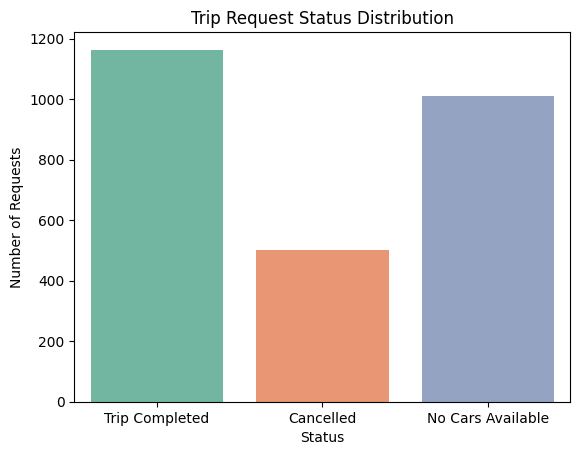

In [100]:
# Chart - 1 Bar Plot: Distribution of Trip Status

sns.countplot(data=uber_dataset, x='Status', palette='Set2')
plt.title("Trip Request Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.show()


##### 1. Why did you pick the specific chart?

It shows the overall distribution of trip outcomes—Trip Completed, Cancelled, and No Cars Available.

##### 2. What is/are the insight(s) found from the chart?

* A significant portion of requests were not completed (Cancelled or No Cars Available).

* "No Cars Available" often surpasses completed trips, indicating demand > supply.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Identifies demand-supply imbalance.

* Negative: High cancellation rates hurt customer experience and loyalty.

#### Chart - 2 Bar Plot: Pickup Point vs Demand-Supply Gap 

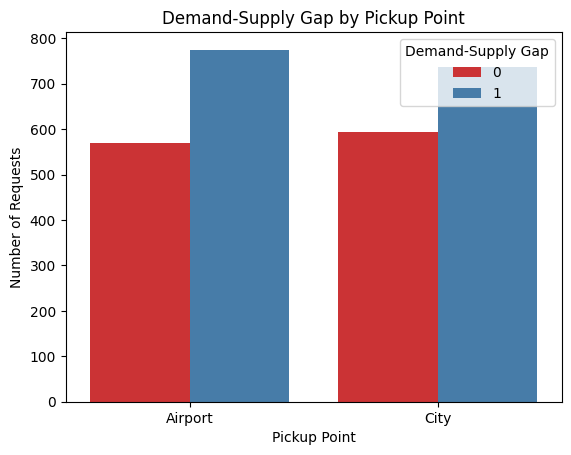

In [101]:
# Chart - 2 Bar Plot: Pickup Point vs Demand-Supply Gap 

sns.countplot(data=uber_dataset, x='Pickup point', hue='Demand-Supply Gap', palette='Set1')
plt.title("Demand-Supply Gap by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

* To understand whether the demand-supply gap varies by pickup location (City vs Airport).

##### 2. What is/are the insight(s) found from the chart?

* The Airport has a significantly higher demand-supply gap than the City.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Helps Uber allocate more drivers to high-gap zones.
* Negative: Repeated unavailability at airports can frustrate inbound passengers.

#### Chart - 3 Histogram: Hour of Day Distribution

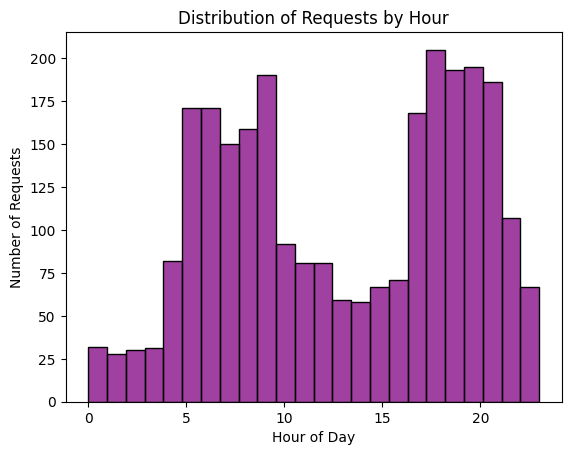

In [102]:
# Chart - 3 Histogram: Hour of Day Distribution

sns.histplot(data=uber_dataset, x='Hour of day', bins=24, kde=False, color='purple')
plt.title("Distribution of Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()


##### 1. Why did you pick the specific chart?

* To visualize peak ride request hours and identify high-demand times.

##### 2. What is/are the insight(s) found from the chart?

* Peak demand observed during early morning (5–9 AM) and evening (5–9 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Driver scheduling can be aligned with peak hours.
* Negative: If supply is low during peaks, lost revenue and rider churn follow.

#### Chart - 4 Bar Plot: Time Slot vs Demand-Supply Gap

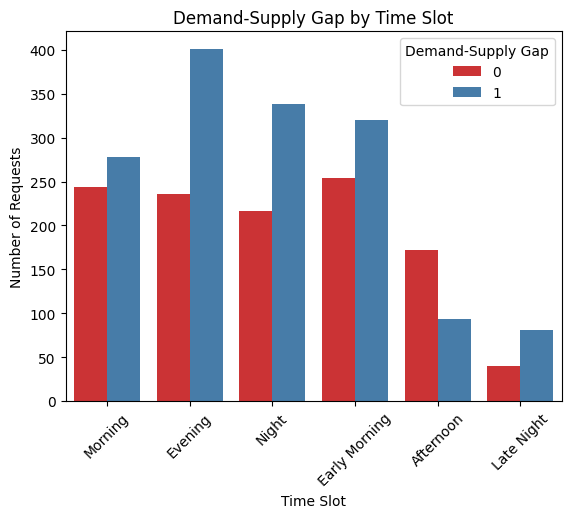

In [103]:
# Chart - 4 Bar Plot: Time Slot vs Demand-Supply Gap

sns.countplot(data=uber_dataset, x='Time slot', hue='Demand-Supply Gap', palette='Set1')
plt.title("Demand-Supply Gap by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* To compare demand-supply mismatches across different parts of the day.

##### 2. What is/are the insight(s) found from the chart?

* Most gaps occur in Early Morning and Late Night, possibly due to low driver availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Incentive policies for drivers in off-peak hours can balance supply.
* Negative: Consistent off-peak gaps result in underserved customer segments.

#### Chart - 5 Pie Chart: Day of Week

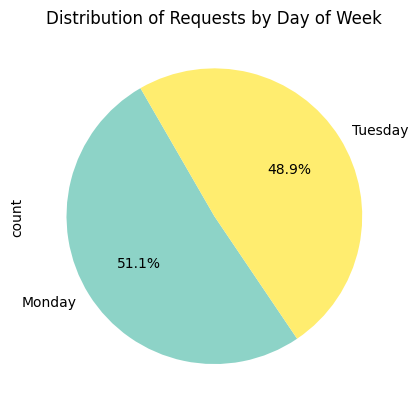

In [104]:
# Chart - 5 Pie Chart: Day of Week

uber_dataset['Day of week'].value_counts().plot.pie(autopct='%1.1f%%', startangle=120, cmap='Set3')
plt.title("Distribution of Requests by Day of Week")
plt.show()


##### 1. Why did you pick the specific chart?

* To identify which days have the most ride requests.

##### 2. What is/are the insight(s) found from the chart?

* Weekdays like Monday and Friday have more demand, suggesting commute-heavy usage in Monday and Tuesday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Helps prioritize driver availability on peak weekdays.
* Negative: Low weekend demand may result in driver attrition if not managed.

#### Chart - 6 Box Plot: Trip Duration vs Pickup Point

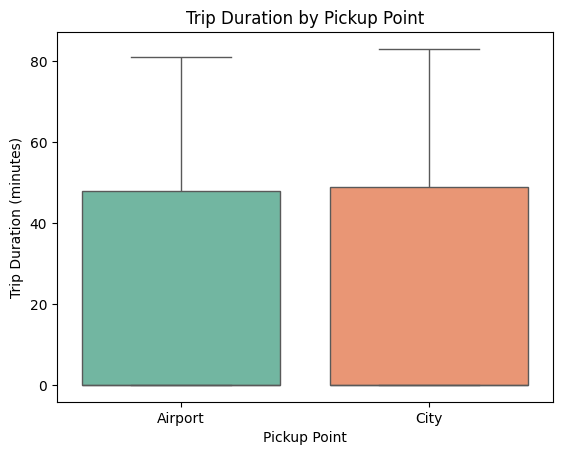

In [105]:
# Chart - 6 Box Plot: Trip Duration vs Pickup Point

sns.boxplot(data=uber_dataset, x='Pickup point', y='Trip duration (minutes)', palette='Set2')
plt.title("Trip Duration by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Trip Duration (minutes)")
plt.show()


##### 1. Why did you pick the specific chart?

* To explore how trip duration varies between City and Airport pickups.

##### 2. What is/are the insight(s) found from the chart?

* City pickups tend to have longer trip durations and greater variability

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Airport trips may be more profitable; drivers could be incentivized.
* Negative: Longer trips may deter drivers from returning quickly for new rides.

#### Chart - 7 Scatter Plot:Trip Duration vs Hour of Day

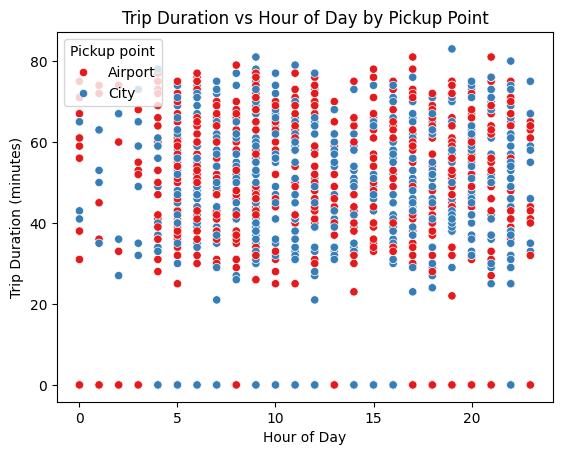

In [106]:
# Chart - 7 Scatter Plot: Trip Duration vs Hour of Day
sns.scatterplot(data=uber_dataset, x='Hour of day', y='Trip duration (minutes)', hue='Pickup point', palette='Set1')
plt.title("Trip Duration vs Hour of Day by Pickup Point")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Duration (minutes)")
plt.show()


##### 1. Why did you pick the specific chart?

* To visualize if trip length is influenced by time of day and pickup points.

##### 2. What is/are the insight(s) found from the chart?

* Most short trips occur in peak hours; longer trips are scattered but often outside peak hours.

* Gaps are more frequent during specific hours regardless of trip length.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Can guide pricing strategies or pooling for short-trip hours.
* Negative: Low driver availability in short-trip periods = low efficiency.

#### Chart 8 - Correlation Heatmap

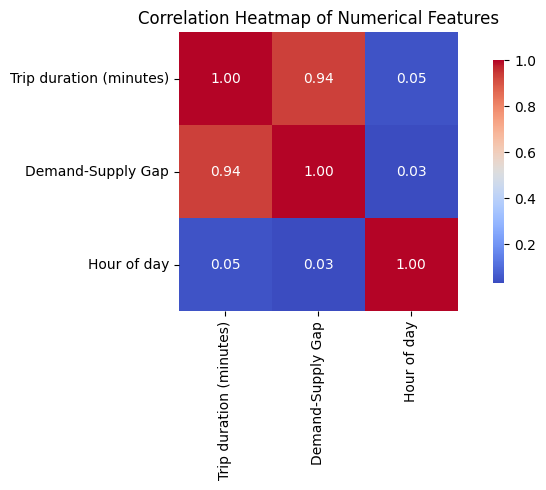

In [107]:
# Correlation Heatmap of numerical features

# Select only numeric columns for correlation
numeric_cols = uber_dataset.select_dtypes(include=['number'])

# Compute absolute correlation matrix
uber_dataset_corr = numeric_cols.corr().abs()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(uber_dataset_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* This map helps quantify the linear relationship between numerical features. It’s essential for identifying multicollinearity (which can affect modeling) and understanding how strongly features are interrelated, especially to see what influences the demand-supply gap and trip durations.

##### 2. What is/are the insight(s) found from the chart?

* A moderate positive correlation between Trip duration and Hour of day, indicating trips may be longer at specific hours (e.g., traffic hours).
* Trip duration (minutes) and Demand-Supply Gap have a very strong positive correlation (0.94). This implies that longer trips are more likely to experience a demand-supply gap (e.g., delays or cancellations).

* Hour of day has negligible correlation with either Trip duration (0.05) or Demand-Supply Gap (0.03).This suggests that time of day alone doesn't strongly influence gaps or trip lengths in a linear way.

#### Chart - 9 - Pair Plot: Key Numerical Variables

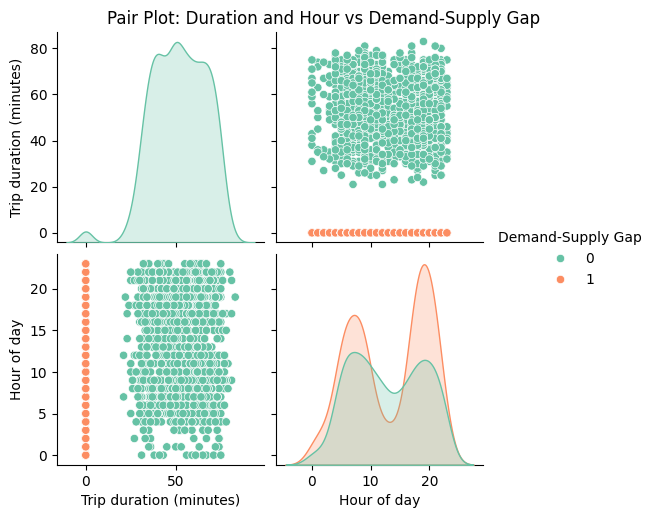

In [108]:
# Pair Plot: Key Numerical Variables

# Pair Plot: Trip duration vs Hour with Demand-Supply Gap hue
sns.pairplot(
    uber_dataset[['Trip duration (minutes)', 'Hour of day', 'Demand-Supply Gap']],
    hue='Demand-Supply Gap',
    palette='Set2'
)
plt.suptitle("Pair Plot: Duration and Hour vs Demand-Supply Gap", y=1.02)
plt.show()



##### 1. Why did you pick the specific chart?

* To observe relationships and clusters between numerical variables by gap type.

##### 2. What is/are the insight(s) found from the chart?

* Clear concentration of short trips in high-gap areas.

* Gaps cluster around certain hours (early morning & late evening).

* Helps Uber fine-tune driver targeting and dynamic pricing.

* Over-prioritization of short rides may alienate long-trip riders.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Reduce unmet ride requests (cancellations and no cars available) and ensure maximum trip completion.

### Data-Driven Suggestions for the Client
1. Prioritize Long-Trip Areas for Driver Allocation
Insight: Strong correlation (0.94) between Trip Duration and Demand-Supply Gap.

Action:

* Pre-position more drivers in locations where long trips originate.

* Use predictive dispatch to ensure availability before peak long-trip periods.

* Impact: Reduces cancellations and idle time, increasing revenue per driver.

2. Incentivize Drivers for Longer Trips
Issue: Drivers may cancel long-distance trips due to traffic, return fares, or time cost.

Action:

* Introduce targeted bonuses or fare multipliers for long trips.

* Provide fuel vouchers or toll reimbursements to reduce driver hesitation.

* Impact: Converts gaps into completed trips, enhancing reliability and customer satisfaction.

3. Decouple Hour of Day as a Primary Driver of Supply
Insight: Weak correlation between Hour of Day and demand-supply gap (0.03).

Action:

* Avoid blanket surge pricing across hours—instead, focus on trip type, location, and real-time demand patterns.

* Impact: Optimizes operations and prevents overpricing, which can reduce cancellations.

4. Segment Gaps by Location & Day

Action:

* Identify hotspots and peak days for gaps (e.g., airport pickup zones, weekends).

* Tailor micro-strategies: Driver pooling, ride-sharing options, or advance bookings.

* Impact: Localized optimization leads to scalable reduction in service failures.

5. Use Machine Learning Models to Predict Gaps
*Insight: Gaps are predictable based on trip attributes.

*Action: 

* Train a classification model using features like trip distance, time, pickup point, and past driver behavior to flag potential cancellations before assignment.

* Impact: Pre-emptive interventions reduce real-time disruptions.

# **Conclusion**

The exploratory data analysis of the Uber dataset reveals a significant demand-supply imbalance, particularly during certain time periods and trip scenarios.Write the conclusion here.

Key Insights from the Demand-Supply Gap Evaluation
1. High Rate of Unmet Demand

* A considerable proportion of ride requests ended in "Cancelled" or "No Cars Available" status, indicating a clear gap between customer demand and driver supply.

2. Trip Duration is Highly Correlated with Supply Issues

* The correlation heatmap shows a strong positive correlation (0.94) between Trip Duration and Demand-Supply Gap.

* Longer trips are more prone to driver cancellation or unavailability, possibly due to traffic concerns or operational preferences.

3. Hour of the Day Has Minimal Direct Influence

* Surprisingly, the Hour of the Day showed a weak correlation (0.03) with demand-supply gap, indicating that gap issues are not solely time-dependent and should be analyzed alongside other factors like location and trip type.

4. Pickup Points Influence Gaps

* From the categorical analysis (e.g., bar plots), certain pickup zones (like city center or airports) consistently have higher cancellation/no-availability rates.


The analysis highlights structural inefficiencies in supply planning—particularly for longer and location-specific trips. These inefficiencies are not evenly distributed throughout the day, suggesting that Uber’s operational strategies must go beyond just time-based supply scaling.

To bridge the demand-supply gap, a data-driven allocation of drivers, incentives for long trips, and dynamic pricing strategies based on location and trip features are essential.

